**Loaded the dataset**
>X will contain all 3 independent variables “Gender” , “Age” and “Salary”

>y will contain the dependent variable “Purchased iPhone”





In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_11_k_nearest_neighbor/iphone_purchase_records.csv")
X = df.iloc[:,:-1].values
y = df.iloc[:, 3].values

In [ ]:
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


**Converted Gender into Number**
>Label Encoding



In [ ]:
from sklearn.preprocessing import LabelEncoder
LE_gender =  LabelEncoder()
X[:,0] = LE_gender.fit_transform(X[:,0])

**Splitted data into training and test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Feature Scaling**
>Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Fitted KNN Classifier**
>Euclidean distance

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# metric = minkowski and p=2 is Euclidean Distance
# metric = minkowski and p=1 is Manhattan Distance
clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier()

**Made Predictions**

In [ ]:
y_pred = clf.predict(X_test)

**Checked Accuracy of the Predictions**
>Compared the predicted result with the actual result using the confusion matrix

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score:",accuracy)

[[64  4]
 [ 3 29]]
Accuracy score: 0.93


**Fitted KNN Regressor**


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
regressor.score(X_test, y_test)

0.6948529411764706

**Inspected Model Fit**

> Computed the difference between each data point’s actual value and predicted value.

> For each difference, took the square of this difference.

> Summed all the squared differences.

> Took the square root of the summed value.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = regressor.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.2252570548079255

In [ ]:
test_preds = regressor.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.2666666666666667

**Visualization**
>In this code block, I've used Seaborn to create a scatter plot of the second and third columns of X_test by subsetting the arrays X_test[:,1] and X_test[:,2].



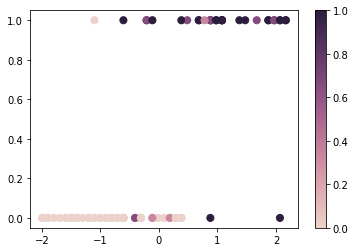

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 1], y_test, c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

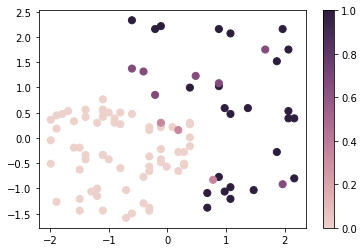

In [ ]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 1], X_test[:, 2], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

**Tuned and Optimized kNN**
>Improved KNN performances in scikit-learn using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In the bellow code, I've printed the parameters that have the lowest error score. With .best_params_, choosing 13 as value for k will yield the best predictive performance.

In [ ]:
gridsearch.best_params_

{'n_neighbors': 13}

**Inspected Model Fit** : Now that I know what the best value of k is, so it is possible to find how it affects my train and test performances.

>It is visible that, the training error is worse than before, but the test error is better than before.

>This model fits less closely to the training data

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
train_rmse

0.26680223378499424

In [ ]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

0.24506972803190757